# Covid cases in the UK

Are cancelled Heathrow flights correlated with covid cases in the UK

Dataset
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv

In [211]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

display(
    f'numpy=={np.__version__}', 
    f'pandas=={pd.__version__}',
    f'matplotlib=={mpl.__version__}',
    f'seaborn=={sns.__version__}',
)

'numpy==1.19.2'

'pandas==1.2.0'

'matplotlib==3.3.3'

'seaborn==0.11.1'

Make graphs look a bit nicer

In [212]:
sns.set(
    style='whitegrid', palette='Set2',
    rc={
        "figure.dpi": 100,
        "axes.spines.top": False,
        "axes.spines.right": False,
    },
)

Import dataset

In [213]:
path = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
data_covid = pd.read_csv(path)

data_covid.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/23/20,12/24/20,12/25/20,12/26/20,12/27/20,12/28/20,12/29/20,12/30/20,12/31/20,1/1/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,50433,50655,50810,50886,51039,51280,51350,51405,51526,51526
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,54317,54827,55380,55755,56254,56572,57146,57727,58316,58316
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,96549,97007,97441,97857,98249,98631,98988,99311,99610,99897
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,7669,7699,7756,7806,7821,7875,7919,7983,8049,8117
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,16931,17029,17099,17149,17240,17296,17371,17433,17553,17568


Drop Lat/Lon

In [214]:
data_covid.drop(["Lat", "Long"], axis='columns', inplace=True)

In [215]:
data_covid.head(5)

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,12/23/20,12/24/20,12/25/20,12/26/20,12/27/20,12/28/20,12/29/20,12/30/20,12/31/20,1/1/21
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,50433,50655,50810,50886,51039,51280,51350,51405,51526,51526
1,NaN,Albania,0,0,0,0,0,0,0,0,...,54317,54827,55380,55755,56254,56572,57146,57727,58316,58316
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,96549,97007,97441,97857,98249,98631,98988,99311,99610,99897
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,7669,7699,7756,7806,7821,7875,7919,7983,8049,8117
4,NaN,Angola,0,0,0,0,0,0,0,0,...,16931,17029,17099,17149,17240,17296,17371,17433,17553,17568


In [216]:
data_covid = (
    data_covid.drop("Province/State", axis='columns')
    .groupby("Country/Region")
    .sum()
)
data_covid.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,12/23/20,12/24/20,12/25/20,12/26/20,12/27/20,12/28/20,12/29/20,12/30/20,12/31/20,1/1/21
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,50433,50655,50810,50886,51039,51280,51350,51405,51526,51526
Albania,0,0,0,0,0,0,0,0,0,0,...,54317,54827,55380,55755,56254,56572,57146,57727,58316,58316
Algeria,0,0,0,0,0,0,0,0,0,0,...,96549,97007,97441,97857,98249,98631,98988,99311,99610,99897
Andorra,0,0,0,0,0,0,0,0,0,0,...,7669,7699,7756,7806,7821,7875,7919,7983,8049,8117
Angola,0,0,0,0,0,0,0,0,0,0,...,16931,17029,17099,17149,17240,17296,17371,17433,17553,17568


Transpose

In [217]:
data_covid = data_covid.T
data_covid.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,4,0,...,0,0,0,0,0,2,0,0,0,0


All our columns are in the correct data type format of an integer, since there are no missing entries currently:

In [218]:
data_covid.isna().any().any()

False

Unfortunately, our indexes are object data types. Encoding them as a datetime type will be far more convenient. So let's go ahead and do that.

In [219]:
data_covid.index = pd.to_datetime(data_covid.index.values)
data_covid.index.dtype

dtype('<M8[ns]')

In [220]:
data_covid_UK = data_covid['United Kingdom'].rename_axis('date')

Let's explore some useful information about this new dataframe we have

In [221]:
data_covid_UK = pd.DataFrame(data_covid_UK)
data_covid_UK = data_covid_UK.reset_index()
data_covid_UK.head(3)

,date,United Kingdom
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0


Extract new cases per day = cases today - cases yesterday

In [222]:
data_covid_new = pd.DataFrame(
    data_covid_UK.iloc[1:].values - data_covid_UK.iloc[:-1].values,
    index=data_covid.iloc[1:].index,
    columns= data_covid_UK.columns,
)

data_covid_new.head(2)

,date,United Kingdom
2020-01-23,1 days,0
2020-01-24,1 days,0


<AxesSubplot:>

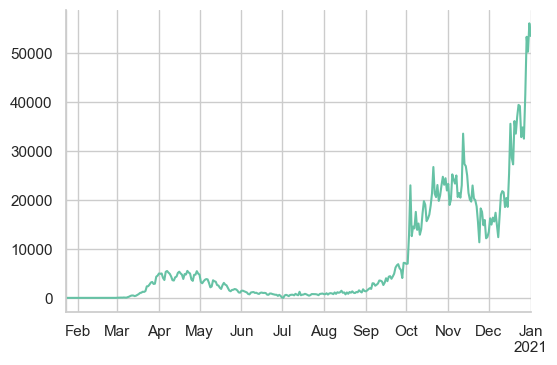

In [223]:
data_covid_new['United Kingdom'].plot(kind = 'line')

In [238]:
data_covid = data_covid_new.reset_index()

dcdf = data_covid.drop(columns = 'date')

dcdf2 = dcdf.rename(columns = {'United Kingdom': 'covid_cases_UK',
                              'index': 'covid_date'})
dcdf2.head(3)

,covid_date,covid_cases_UK
0,2020-01-23,0
1,2020-01-24,0
2,2020-01-25,0


In [240]:
dcdf2.to_csv('C:\\Users\\ellio\\Desktop\\Python\\scripts\\ML_flight_cancellation_prediction\\datasets\\daily_uk_covid_cases.csv')